In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import utils

from cmcrameri import cm

plt.rcParams.update(utils.rcparams)

In [2]:
N_min = 0
N_max = 20

N_list = list(range(N_min,N_max+1))

# Create a custom colormap
color_list = [cm.roma(N/N_max) for N in N_list]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    None, color_list, N=len(color_list)
    )

In [3]:
sim_info = utils.load_cce_data(1)
sim = sim_info['sim']
chif = sim.chif_mag
Mf = sim.Mf

In [4]:
sim_info = utils.t0NM_finder(sim_info, N_max)

Calculating for n = 0
Calculating for n = 1
Calculating for n = 2
Calculating for n = 3
Calculating for n = 4
Calculating for n = 5
Calculating for n = 6
Calculating for n = 7
Calculating for n = 8
Calculating for n = 9
Calculating for n = 10
Calculating for n = 11
Calculating for n = 12
Calculating for n = 13
Calculating for n = 14
Calculating for n = 15
Calculating for n = 16
Calculating for n = 17
Calculating for n = 18
Calculating for n = 19
Calculating for n = 20


In [5]:
sim_info['t0_list'][0]

[np.float64(44.20783327052595), np.float64(-12.900163016807117)]

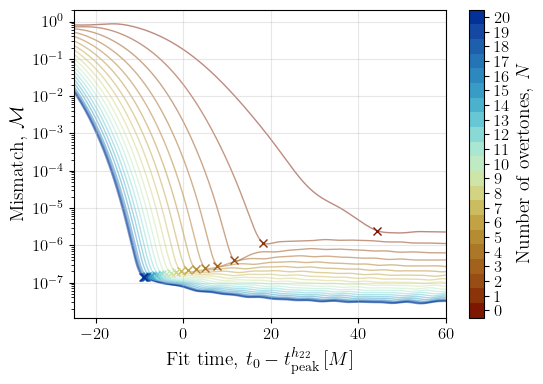

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_yscale('log')
ax.grid(alpha=0.3)

norm = mpl.colors.Normalize(vmin=N_min-0.5, vmax=N_max+0.5)

fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=ax, 
    ticks=range(N_min, N_max+1),
    label=r'Number of overtones, $N$'
    )

for n in N_list:
    
    ax.plot(
        sim.times[(sim.times > -30) & (sim.times < 100)],
        sim_info['mm_lists'][n],
        color=cmap(n/N_max),
        zorder=1,
        alpha=0.5,
        lw=1
        )
    
    ax.plot(
        sim_info['t0_list'][n][0],
        np.exp(sim_info['t0_list'][n][1]),
        color=cmap(n/N_max),
        marker='x',
        markersize=6,
        zorder=2
    )
    
ax.set_xlim(-25, 60)

ax.set_xlabel(r'Fit time, $t_0 - t_\mathrm{peak}^{h_{22}}\,[M]$')
ax.set_ylabel(r'Mismatch, $\mathcal{M}$')

fig.savefig('figures/presentation/mismatch_curves.png', dpi=300, bbox_inches='tight')

In [9]:
import qnmfits

In [10]:
t0_array = sim.times[(sim.times > -30) & (sim.times < 100)]

Nmax = 20
additional_modes = [(3,2,0,1)]
mode_list = utils.get_mode_list(Nmax, additional_modes)

mm_lists = []
for i, modes in enumerate(mode_list):
    mm_list = qnmfits.mismatch_t0_array(
        sim.times,
        sim.h[2, 2],
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0_array=t0_array,
        t0_method='closest'
    )
    mm_lists.append(mm_list)

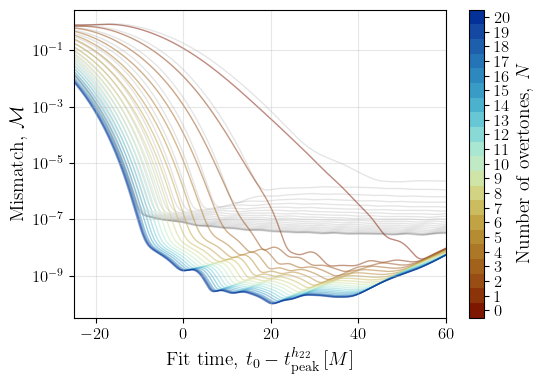

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_yscale('log')
ax.grid(alpha=0.3)

norm = mpl.colors.Normalize(vmin=N_min-0.5, vmax=N_max+0.5)

fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=ax, 
    ticks=range(N_min, N_max+1),
    label=r'Number of overtones, $N$'
    )

for n in N_list:

    ax.plot(
        sim.times[(sim.times > -30) & (sim.times < 100)],
        sim_info['mm_lists'][n],
        color='k',
        zorder=1,
        alpha=0.1,
        lw=1
        )
    
    ax.plot(
        sim.times[(sim.times > -30) & (sim.times < 100)],
        mm_lists[n],
        color=cmap(n/N_max),
        zorder=1.1,
        alpha=0.5,
        lw=1
        )
    
ax.set_xlim(-25, 60)

ax.set_xlabel(r'Fit time, $t_0 - t_\mathrm{peak}^{h_{22}}\,[M]$')
ax.set_ylabel(r'Mismatch, $\mathcal{M}$');